
- [Link al Dataset](https://www.kaggle.com/datasets/ahmettalhabektas/argentina-car-prices)

# Indice

- [Limpiando el Dataset](#Limpiando-el-Dataset) 
    - [Valores nulos](#Valores-nulos)
    - [Columna Currency](#Columna-Currency)
- [Precios](#Precios)
- [Marcas](#Marcas)
    - [Las 10 mas repetidas](#Las-10-mas-repetidas)
        - [Precio promedio](#Precio-promedio)
        - [Tiempo de fabricacion](#Tiempo-de-fabricacion)
        - [Colores](#Colores)
        - [Caja de cambio](#Caja-de-cambio)
        - [Motores](#Motores)
        - [Tipo de cuerpo](#Tipo-de-cuerpo)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib.colors as mcolors

# Creando la paleta de colores
color_palette = list(mcolors.CSS4_COLORS.keys())[:10]

# Generando colores similares al color especificado
color_palette = mcolors.to_rgba('#003f5c', color_palette)
colores=[['aliceblue','antiquewhite','aqua','aquamarine','azure','beige','bisque','black','blanchedalmond','blue']]

In [3]:
df = pd.read_csv('argentina_cars.csv')
df.head()

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550,dólares
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,pesos


In [4]:
df.shape

(510, 12)

In [5]:
df.dtypes

money           int64
brand          object
model          object
year            int64
color          object
fuel_type      object
door          float64
gear           object
motor          object
body_type      object
kilometres      int64
currency       object
dtype: object

# Limpiando el Dataset

## Valores nulos

In [6]:
df.isna().sum()

money          0
brand          0
model          0
year           0
color         11
fuel_type      0
door           0
gear           1
motor         11
body_type      1
kilometres     0
currency       0
dtype: int64

En un Dataset con 510 filas, prescindir de algunas de ellas, las que no tiene valores asignados, no generará ningún perjuicio

In [7]:
df = df.dropna()
df.isna().sum()

money         0
brand         0
model         0
year          0
color         0
fuel_type     0
door          0
gear          0
motor         0
body_type     0
kilometres    0
currency      0
dtype: int64

## Columna Currency

Como tenemos dos tipos de moneda, vamos a estandarizar el cambio y dejar todo los precios en dólares.

Para ello, vamos a tomar el precio actual del dólar blue que es igual a $358 pesos argentinos.

Aplicamos la medida de conversión sólo a aquellas filas cuyo tipo de cambio sea el peso.

In [8]:
df.loc[df['currency']=='pesos', 'money'] = round(df.loc[df['currency']=='pesos', 'money']/358)

Luego, estandarizamos el nombre de la moneda a 'dolares', sin el acento para que sea más ágil a la hora de operar sobre el Dataset.

In [9]:
df['currency'] = 'dolares'

Cambiamos el nombre de la columna 'money' por el de 'price', ya que este último es más apropiado.

In [10]:
df.rename(columns={'money': 'price'}, inplace=True)

In [11]:
df.head()

,price,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
1,30307,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,dolares
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dolares
4,16201,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,dolares
5,34500,Jeep,Compass,2022,Negro,Nafta,5.0,Automática,1.3,SUV,10500,dolares
6,25000,Kia,Sorento,2014,Negro,Diésel,5.0,Automática,2.2,SUV,156000,dolares


# Precios

Veamos la distribución de los precios ahora que hemos normalizado su escala.

Text(0.5, 1.0, 'Frecuencia de distribución de los precios')

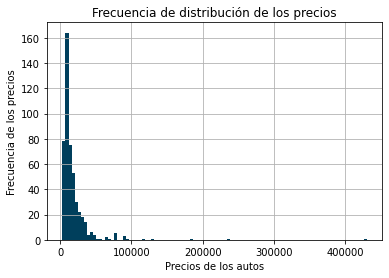

In [12]:
df['price'].hist(bins=100, color='#003f5c')
plt.xlabel('Precios de los autos')
plt.ylabel('Frecuencia de los precios')
plt.title('Frecuencia de distribución de los precios')

¿Qué nos muestra el anterior histograma?

El anterior histograma nos muestra que los precios mayoritarios de nuestro Dataset son inferiores a los 50000 USD.

Veamos esto último con mayor detalle.

In [13]:
topDiezPrecios = df['price'].value_counts()[:10]
topDiezPrecios.sort_index()

6983     5
7821     6
8380     6
8799     6
8910     5
9748     5
10056    5
10196    5
10615    5
14525    5
Name: price, dtype: int64

Esto nos muestra que dentro de los precios que más se repiten, el menor de ellos es de $6983 y el mayor de ellos es de $14525.

Ahora veamos el menor y mayor precio presente en este Dataset.

In [14]:
df['price'].min(), df['price'].max()

(3352, 430000)

Podríamos ver a qué auto/s corresponde este precio.

In [15]:
df.loc[df['price']==3352, ['price', 'brand', 'model', 'year', 'kilometres']]

,price,brand,model,year,kilometres
421,3352,Chevrolet,Corsa,2008,150000


In [16]:
df.loc[df['price']==430000, ['price', 'brand', 'model', 'year', 'kilometres']]

,price,brand,model,year,kilometres
461,430000,Audi,R8 Coupé,2020,3000


# Marcas

Lo primero a observar es cuáles son las marcas que tenemos en nuestro Dataset

In [17]:
df['brand'].unique()

array(['Jeep', 'Toyota', 'Kia', 'Mercedes-Benz', 'BMW', 'Volkswagen',
       'Ford', 'Renault', 'Mini', 'Chevrolet', 'Peugeot', 'Honda',
       'Dodge', 'Fiat', 'Hyundai', 'Audi', 'Citroën', 'Nissan', 'RAM',
       'Baic', 'Mitsubishi', 'Subaru', 'Chery', 'Suzuki', 'Volvo', 'DS'],
      dtype=object)

In [18]:
df['brand'].value_counts()[:10]

Volkswagen    86
Ford          55
Chevrolet     49
Peugeot       47
Toyota        43
Renault       43
Citroën       29
Fiat          23
Jeep          20
Honda         18
Name: brand, dtype: int64

In [19]:
topDiezMarcas = df[(df['brand']=='Volkswagen') | (df['brand']=='Ford')|(df['brand']=='Chevrolet')|(df['brand']=='Peugeot')|(df['brand']=='Toyota')|(df['brand']=='Renault')|(df['brand']=='Citroën')|(df['brand']=='Fiat')|(df['brand']=='Jeep')]

## Las 10 mas repetidas

<AxesSubplot: ylabel='Marcas'>

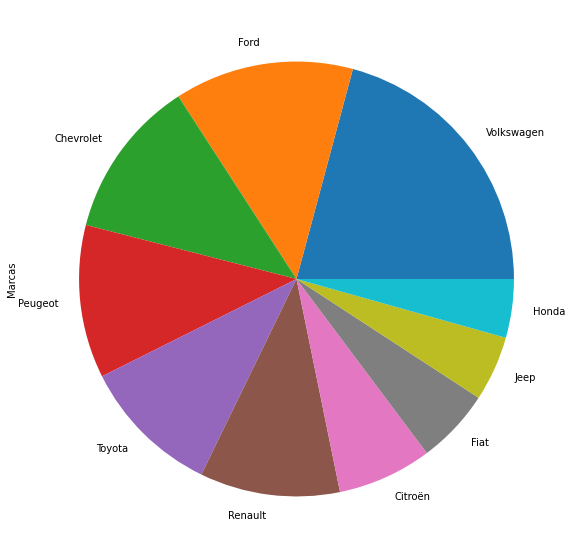

In [20]:
df['brand'].value_counts().head(10).plot(kind='pie', figsize=(15,10), ylabel='Marcas')

Veamos los precios de las 10 marcas más repetidas

<AxesSubplot: xlabel='brand', ylabel='price'>

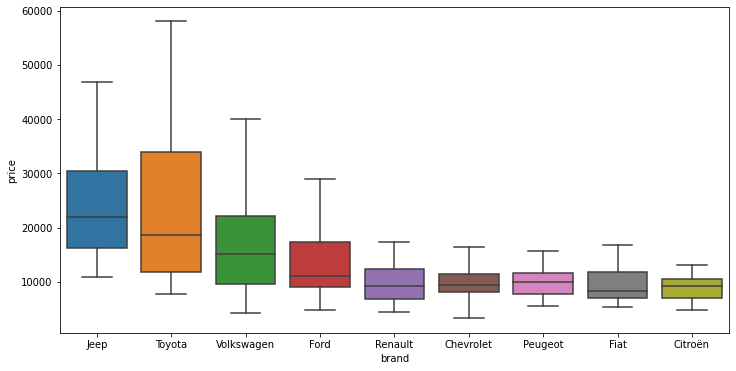

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='price', x='brand', data=topDiezMarcas, showfliers=False)

Algunas conclusiones que pueden extraerse son las siguientes:

1. De las marcas más repetidas del Dataset, **Chevrolet** es la que tiene el auto más barato. 
2. **Toyota** es de las márcas más caras.
    1. Incluso **Toyota** tiene el auto más caro dentro de esta selección.
    2. El rango de precio de esta marca es mayor que el de las demás.
3. Las 5 marcas con rangos de precios más económicos son **Renault**, **Chevrolet**, **Peugeot**, **Fiat** y **Citröen**.

### Precio promedio

In [22]:
mediaPorMarca = round(topDiezMarcas.groupby('brand')['price'].mean())
pd.DataFrame(mediaPorMarca)
mediaPorMarca = mediaPorMarca.reset_index()
mediaPorMarca

,brand,price
0,Chevrolet,10769.0
1,Citroën,9356.0
2,Fiat,9950.0
3,Ford,16670.0
4,Jeep,26400.0
5,Peugeot,10995.0
6,Renault,9631.0
7,Toyota,23459.0
8,Volkswagen,17237.0


Text(0.5, 1.0, 'Precio promedio de las 10 marcas más relevantes')

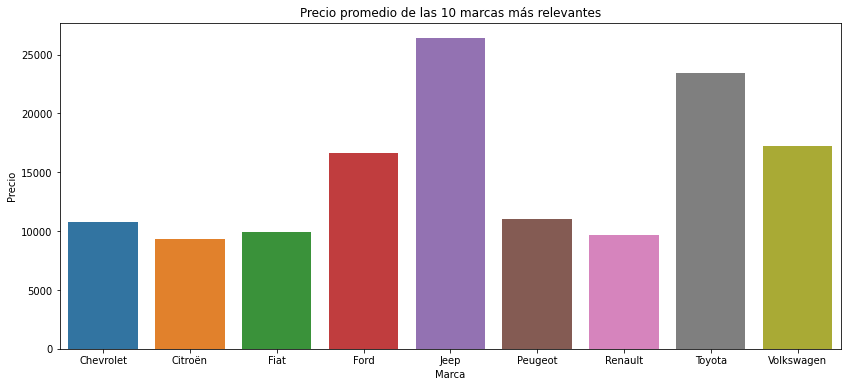

In [23]:
plt.figure(figsize=(14,6))
sns.barplot(x='brand', y='price', data=mediaPorMarca)
plt.xlabel('Marca')
plt.ylabel('Precio')
plt.title('Precio promedio de las 10 marcas más relevantes')

### Tiempo de fabricacion

In [24]:
marcasYanios = topDiezMarcas[['brand', 'year']].value_counts()
marcasYanios = pd.DataFrame(marcasYanios)
marcasYanios = marcasYanios.reset_index()
marcasYanios = marcasYanios.rename(columns={0:'total'})
marcasYanios

,brand,year,total
0,Volkswagen,2019,15
1,Volkswagen,2018,14
2,Volkswagen,2016,12
3,Toyota,2019,12
4,Chevrolet,2016,11
...,...,...,...
100,Chevrolet,2011,1
101,Peugeot,2011,1
102,Peugeot,2021,1
103,Peugeot,2022,1


Text(0.5, 1.0, 'Cantidad de autos por marcas y año de fabricación')

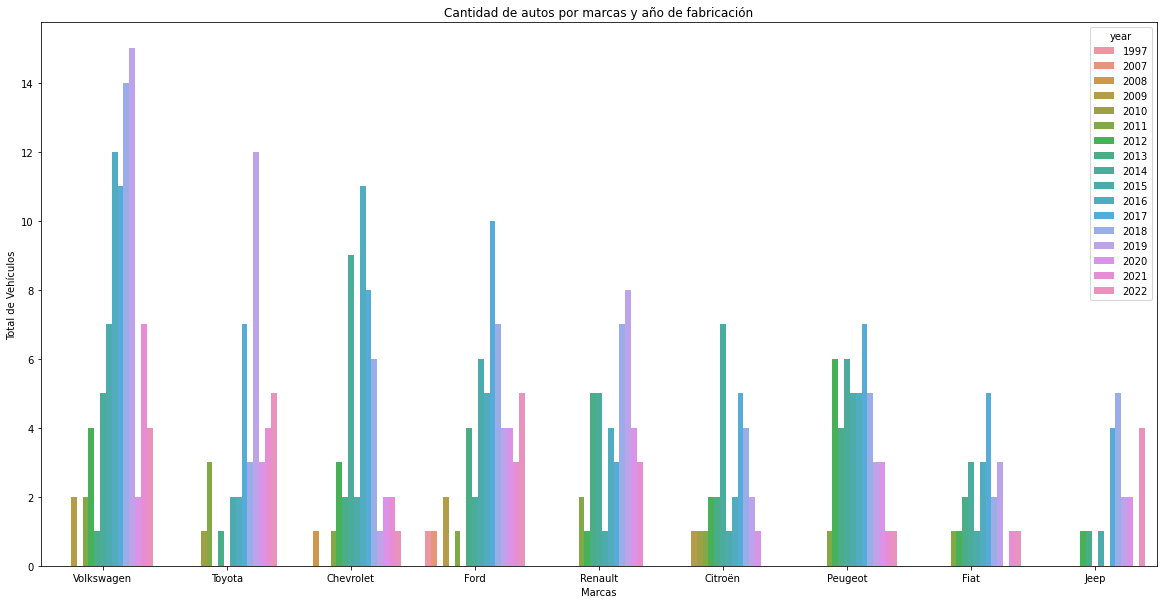

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(x='brand', y='total', hue='year', errorbar=None, data=marcasYanios)
plt.xlabel('Marcas')
plt.ylabel('Total de Vehículos')
plt.title('Cantidad de autos por marcas y año de fabricación')

De el anterior gráfico podemos deducir lo siguiente:
1. **Volkwagen** tiene la mayor cantidad de vehículos producidos en el año 2015.
2. **Ford** es la compañía que tiene los modelos de autos más antigüos. 
    1. Tiene la mayor cantidad de modelos en el año 2010.
3. **Jeep** es la marca que tiene los modelos más recientes.
    1. Su mayor producción es del año 2018, seguido por el 2022.
4. **Renault**, **Citroën** y **Peugeot** tienen la mayor cantidad de modelos producidos entre el 2007 y 2008.

In [26]:
print('El año promedio de fabriación de los vehículos es:',round(marcasYanios['year'].mean()))

El año promedio de fabriación de los vehículos es: 2016


In [27]:
marcasYanios['year'].value_counts()[:10]

2019    9
2018    9
2017    9
2015    9
2013    9
2016    8
2011    8
2020    8
2022    7
2012    7
Name: year, dtype: int64

Con el anterior comando podemos observar que los años que más se repiten son 2013, 2015, 2017, 2018 y 2019.

### Colores

In [28]:
marcasYcolor = topDiezMarcas[['brand', 'color']].value_counts()
marcasYcolor= pd.DataFrame(marcasYcolor)
marcasYcolor = marcasYcolor.reset_index()
marcasYcolor = marcasYcolor.rename(columns={0:'total'})

Text(0.5, 1.0, 'Cantidad de autos por marcas y color')

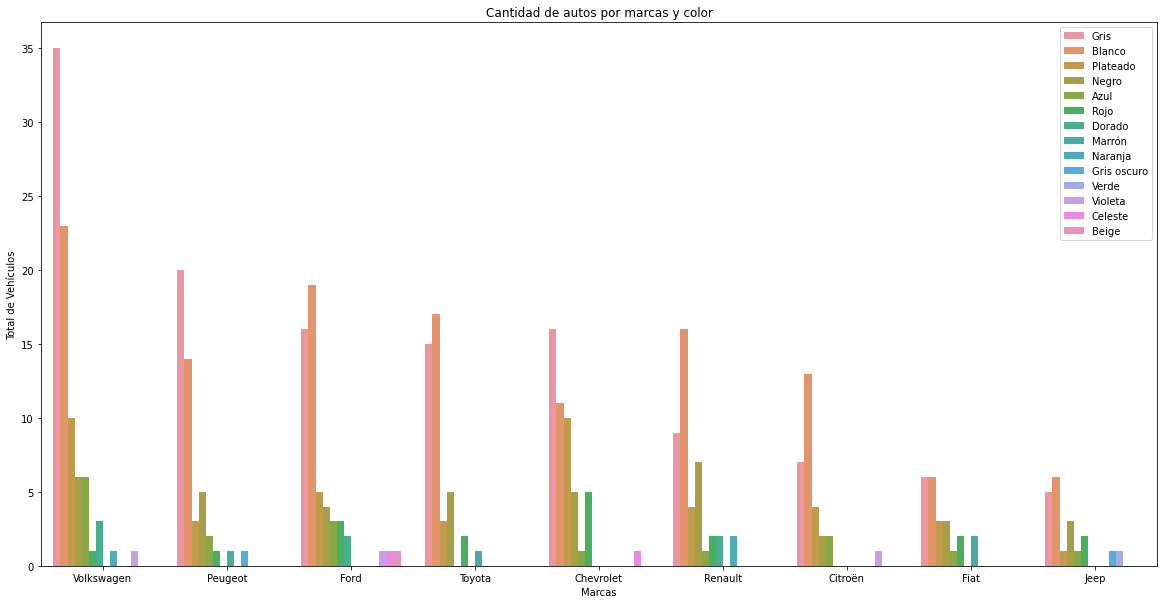

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(x='brand', y='total', hue='color', errorbar=None, data=marcasYcolor)
plt.xlabel('Marcas')
plt.ylabel('Total de Vehículos')
plt.legend(loc='upper right')
plt.title('Cantidad de autos por marcas y color')

Este gráfico no llega a ser del todo claro. Sin embargo, se puede apreciar que los colores mayormente preferido por las marcas son el gris, blanco, plateado y negro. 

In [30]:
marcasYcolor['color'].value_counts()

Gris           9
Blanco         9
Plateado       9
Negro          9
Azul           8
Rojo           8
Dorado         3
Marrón         3
Violeta        3
Naranja        2
Gris oscuro    2
Celeste        2
Verde          1
Beige          1
Name: color, dtype: int64

Con esta tabla, lo anterior queda más claro. Además, se puede aprecir que de los colores menos favoritos se encuentran el verde y el beige.

### Caja de cambio

In [31]:
topDiezMarcas['gear'].value_counts()

Manual        250
Automática    145
Name: gear, dtype: int64

Text(0, 0.5, 'Caja de cambio')

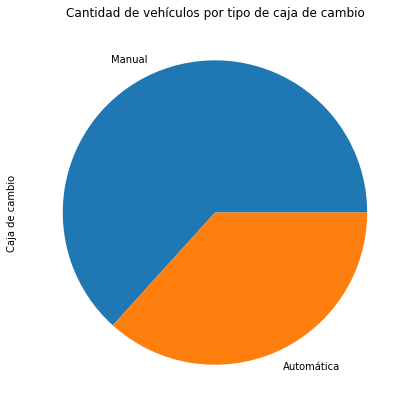

In [32]:
plt.figure(figsize=(14,7))
plt.title('Cantidad de vehículos por tipo de caja de cambio')
topDiezMarcas['gear'].value_counts().plot(kind='pie')
plt.ylabel('Caja de cambio')

Aquí podemos observar que el tipo de caja de cambio predominante en el Dataset es la manual. 

Ahora veamos el tipo de fabricación de caja de acuerdo a la marca

In [33]:
marcasYcaja = topDiezMarcas[['brand', 'gear']].value_counts()
marcasYcaja= pd.DataFrame(marcasYcaja)
marcasYcaja = marcasYcaja.reset_index()
marcasYcaja = marcasYcaja.rename(columns={0:'total'})
marcasYcaja

,brand,gear,total
0,Volkswagen,Manual,43
1,Volkswagen,Automática,43
2,Peugeot,Manual,40
3,Renault,Manual,38
4,Ford,Manual,37
5,Chevrolet,Manual,35
6,Toyota,Automática,28
7,Fiat,Manual,20
8,Ford,Automática,18
9,Citroën,Manual,16


Text(0.5, 1.0, 'Cantidad de autos por marcas y color')

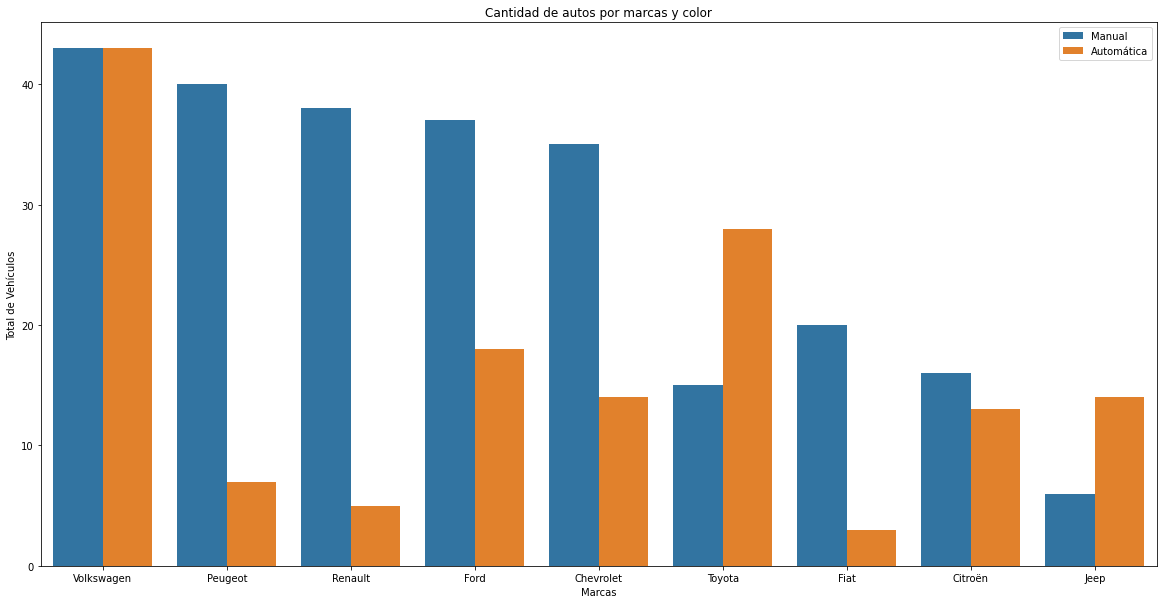

In [34]:
plt.figure(figsize=(20,10))
sns.barplot(x='brand', y='total', hue='gear', errorbar=None, data=marcasYcaja)
plt.xlabel('Marcas')
plt.ylabel('Total de Vehículos')
plt.legend(loc='upper right')
plt.title('Cantidad de autos por marcas y color')

Las conclusiones que podemos sacar son las siguientes:

1. Las únicas marcas que presentan una mayor cantidad de producción de cajas automáticas son **Jeep** y **Toyota**. El resto producen más autos con caja manual.

2. **Volkswagen** es la excepción a la regla anterior. Produce igual cantidad de vehículos con caja manual y automática.
3. **Fiat**, **Renault** y **Peugeot** son las marcas que menos producen vehículos con caja de cambio automática.

Una pregunta que podríamos hacernos es si el tipo de caja se ve reflejado en el precio del vehículo.

Text(91.875, 0.5, 'Marca')

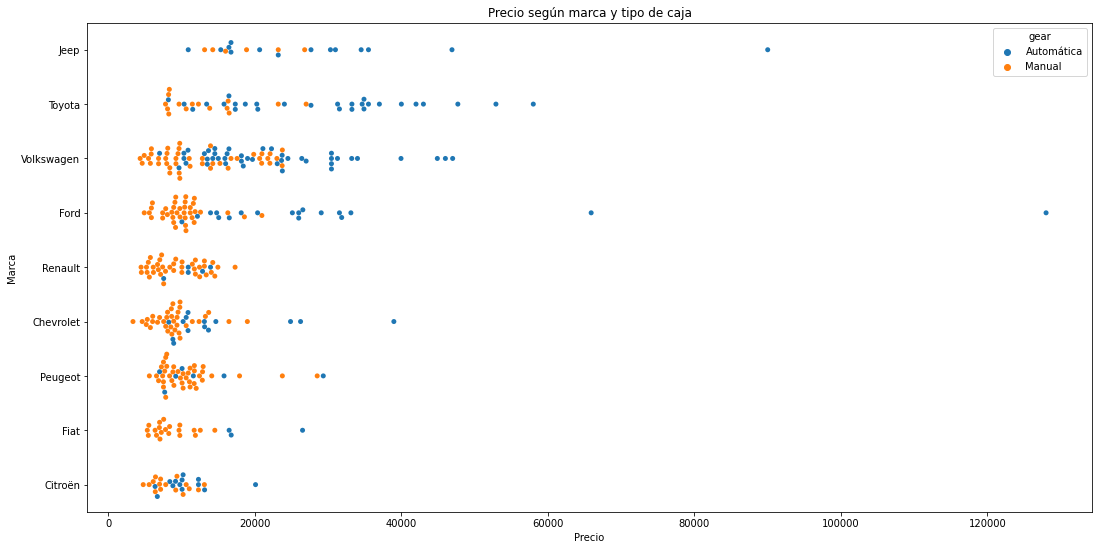

In [35]:
plt.figure(figsize=(18,9))
plt.title('Precio según marca y tipo de caja')
sns.swarmplot(data=topDiezMarcas, x="price", y="brand", hue="gear")
plt.xlabel('Precio')
plt.ylabel('Marca')

Si bien es menor la cantidad de puntos azules presentes en el gráfico (*caja manual*), puede observarse que una buena proción de ellos se encuentra desplazado a la derecha. 
Esto nos indica que, en general, la caja automática suele hacer que el precio del vehículo aumente.

Si planteamos un panorama general de la variable categórica analizada, podemos generar el siguiente gráfico:

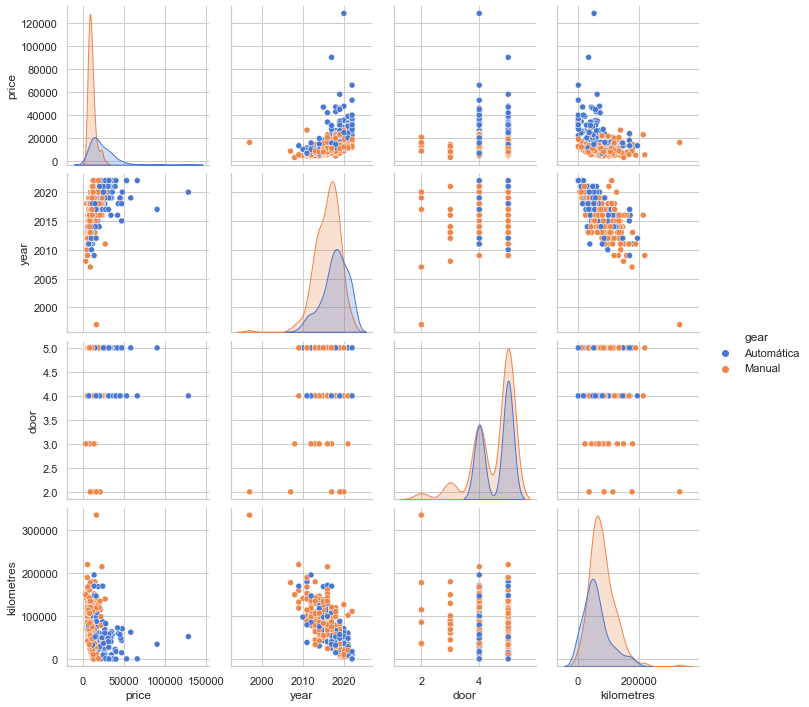

In [36]:
sns.set_theme(style="whitegrid", palette="muted")
sns.pairplot(topDiezMarcas, hue='gear')

Algunas observaciones extraídas del gráfico:
1. Cuánto más moderno es el auto y menor es su cantidad de kilometrajes, el tipo de caja tiende a ser automática.

2. Cuánto mayor es el precio y menor la cantidad de kilómetros, la caja tiende a ser automática. 

3. Los autos de 2 y 3 puertas suelen tener caja automática. Los vehículos de 4 y 5 puertas pueden tener cualquiera de las dos cajas. Sin embargo, cuánto mayor es el precio, más probable es que la caja sea automática.

### Motores

In [37]:
topDiezMarcas['fuel_type'].value_counts()

Nafta            311
Diésel            62
Nafta/GNC         19
Híbrido/Nafta      3
Name: fuel_type, dtype: int64

Text(0.5, 1.0, 'Cantidad de vehículos por tipo de motor')

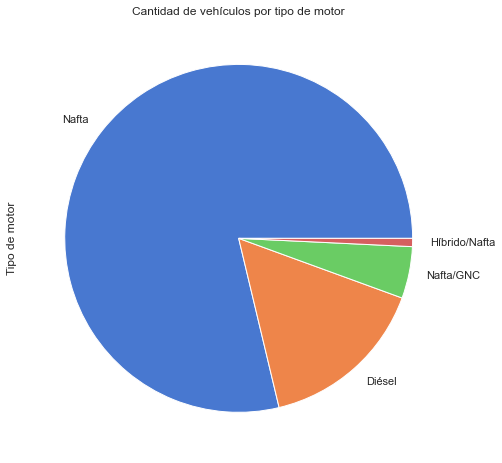

In [38]:
plt.figure(figsize=(16,8))
topDiezMarcas['fuel_type'].value_counts().plot(kind='pie')
plt.ylabel('Tipo de motor')
plt.title('Cantidad de vehículos por tipo de motor')

Cómo puede apreciarse la mayor cantidad de vehículos producidos son a nafta. Luego, tenemos los vehículos a Diesel y Nafta/GNC. Los vehículos menos producidos son los híbridos. 

In [39]:
marcasYmotor = topDiezMarcas[['brand', 'fuel_type']].value_counts()
marcasYmotor= pd.DataFrame(marcasYmotor)
marcasYmotor = marcasYmotor.reset_index()
marcasYmotor = marcasYmotor.rename(columns={0:'total'})
marcasYmotor

,brand,fuel_type,total
0,Volkswagen,Nafta,67
1,Ford,Nafta,42
2,Renault,Nafta,39
3,Peugeot,Nafta,39
4,Chevrolet,Nafta,37
5,Toyota,Nafta,26
6,Citroën,Nafta,24
7,Jeep,Nafta,20
8,Volkswagen,Diésel,18
9,Fiat,Nafta,17


Realizando el análisis por cada marca obtenemos:

Text(0.5, 1.0, 'Cantidad de autos por marcas y motor')

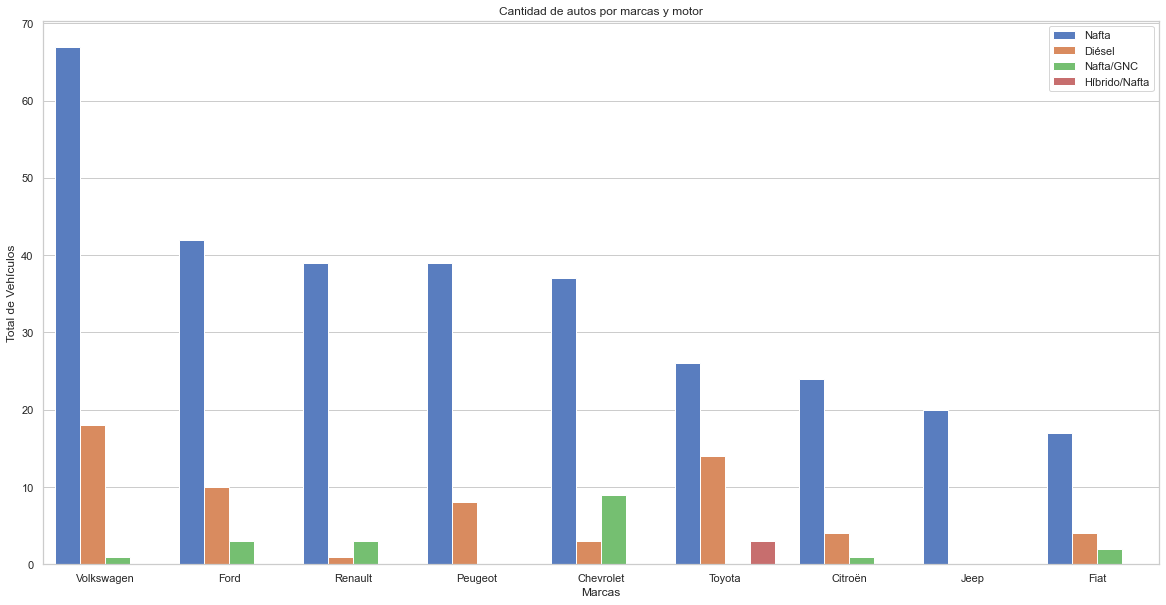

In [40]:
plt.figure(figsize=(20,10))
sns.barplot(x='brand', y='total', hue='fuel_type', errorbar=None, data=marcasYmotor)
plt.xlabel('Marcas')
plt.ylabel('Total de Vehículos')
plt.legend(loc='upper right')
plt.title('Cantidad de autos por marcas y motor')

¿Influye el tipo de motor en el precio del vehículo?

Text(89.75, 0.5, 'Marca')

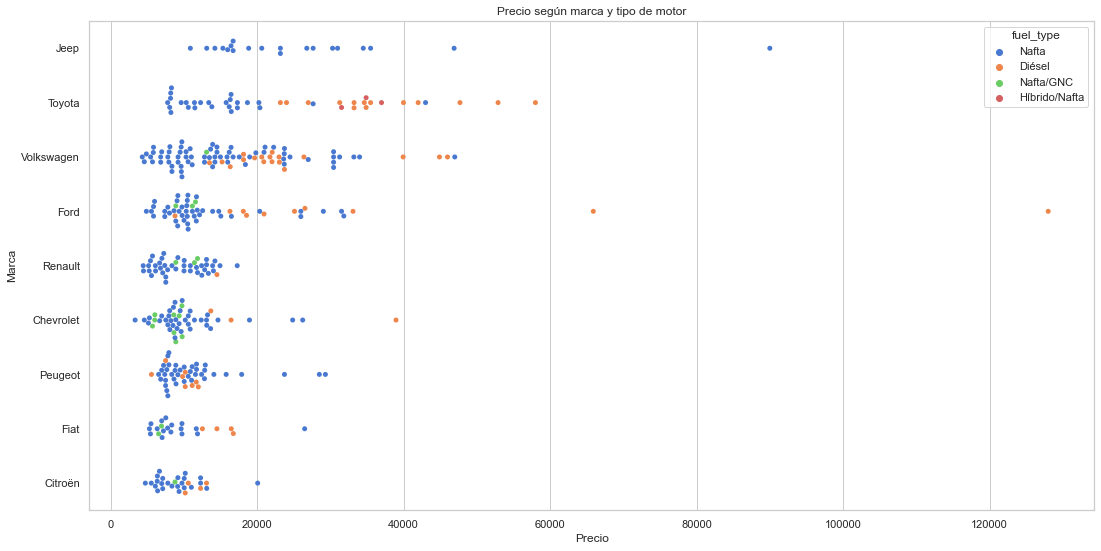

In [41]:
plt.figure(figsize=(18,9))
plt.title('Precio según marca y tipo de motor')
sns.swarmplot(data=topDiezMarcas, x="price", y="brand", hue="fuel_type")
plt.xlabel('Precio')
plt.ylabel('Marca')

En resumen:

1. En general los motores a Nafta y Nafta/GNC suelen pertenecer a vehículos más económicos.

2. Los vehículos híbridos y a diesel son más caros.

Hay que tener presente que esto son algunas reglas generales, ya que, por ejemplo, podemos encontrarnos con marcas (**Jeep**) que sólo fabrique motores nafteros.

Haciendo un resumen del gráfico:

1. Todas las marcas producen vehículos a nafta.

2. La única marca que no produce vehículos a diesel es **Jeep**.

3. **Peugeot**, **Toyota** y **Jeep** no producen vehículos a Nafta/GNC.

4. Sólo **Toyota** produce vehículos híbridos.

### Tipo de cuerpo

In [42]:
topDiezMarcas['body_type'].value_counts()

Hatchback      148
SUV             97
Sedán           81
Pick-Up         46
Monovolumen     15
Furgón           6
Rural            2
Name: body_type, dtype: int64

Text(0, 0.5, 'Cuerpo del vehículo')

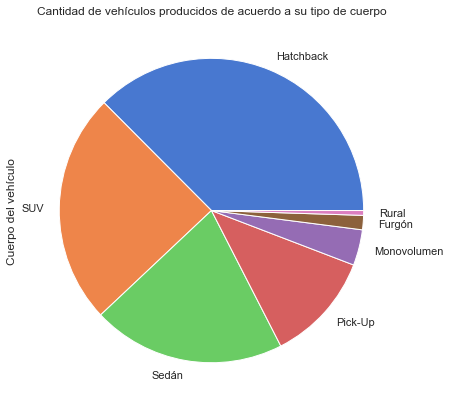

In [43]:
plt.figure(figsize=(14,7))
topDiezMarcas['body_type'].value_counts().plot(kind='pie')
plt.title('Cantidad de vehículos producidos de acuerdo a su tipo de cuerpo')
plt.ylabel('Cuerpo del vehículo')

Lo que puede apreciarse es que Hatchback, SUV y Sedán son los tipos de cuerpo con mayor presencia en el Dataset

Text(89.75, 0.5, 'Marca')

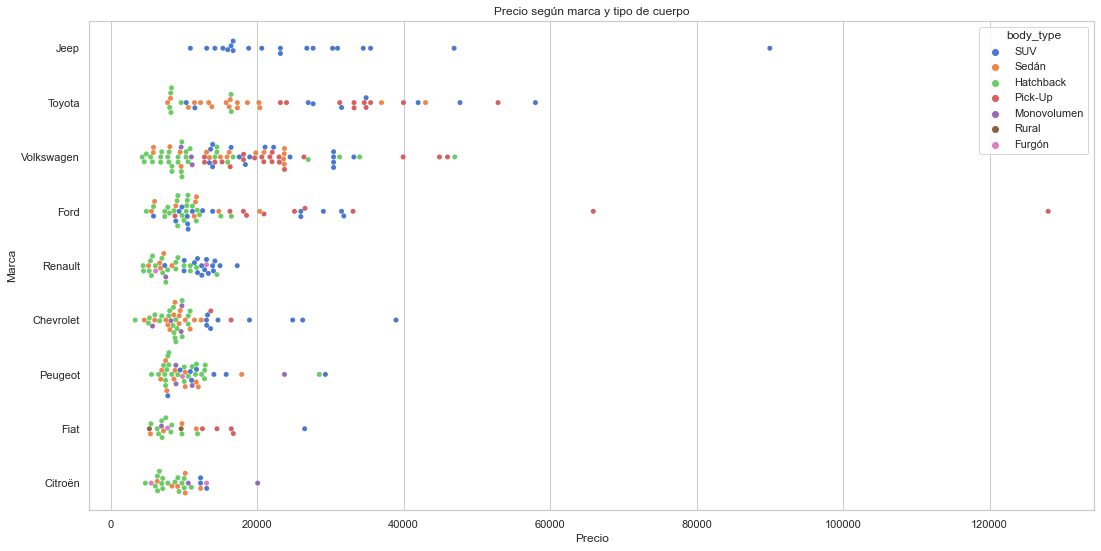

In [44]:
plt.figure(figsize=(18,9))
plt.title('Precio según marca y tipo de cuerpo')
sns.swarmplot(data=topDiezMarcas, x="price", y='brand', hue="body_type")
plt.xlabel('Precio')
plt.ylabel('Marca')

Lo que puede apreciarse de este gráfico es:

1. El tipo de cuerpo Hatchback tiende a ser el más económico.

2. Las Pick-Up son vehículos con un precio, en general, mayor.

3. **Jeep** sólo tiene presencia con vehículos del tipo SUV.

4. **Volkswagen** es la marca con mayor cantidad de tipos de cuerpo diferentes producidos.